## Journal used for the implemetation
Journal title:  Facial Expression Recognition and Face Recognition Using a Convolutional Neural Network

Authors: Suci Dwijayanti, Rahmad Rhedo Abdillah, Hera Hikmarika, Hermawati, Zaenal Husin, Bhakti Yudho , Suprapto

Journal Name: Facial Expression Recognition and Face Recognition Using a Convolutional Neural Network

Year: 2020
##### File Name : Facial_Expression_Recognition_and_Face_Recognition_Using_a_Convolutional_Neural_Network.pdf

In [2]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 4.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


Choosen Application Area is Expression Recoginition from images
We have choosen Paper no 2 for the recognition
Facial Expression recognition using CNN

# 1. Import the required libraries

In [66]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

import matplotlib.pyplot as plt
from keras.layers import Activation
from keras import regularizers
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves from any data source.

Provide the URL of the data used.

Write Code for converting the above downloaded data into a form suitable for DL



In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:

!kaggle datasets download -d msambare/fer2013

 81% 49.0M/60.3M [00:00<00:00, 104MB/s] 
100% 60.3M/60.3M [00:00<00:00, 108MB/s]


In [1]:
import zipfile
zip_ref = zipfile.ZipFile('/Users/harpreetsingh/Desktop/SEM2/DNN/face-expression.zip' , 'r')
zip_ref.extractall()
zip_ref.close()

# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded. 


This stage depends on the dataset that is used. 

#### Images were resized to 32 X 32 from input image size of 48 X 48 in the dataset as this was done in our research paper

In [12]:
train_data = tf.keras.utils.image_dataset_from_directory(
    '../images/train',
    labels="inferred",
    label_mode="int",
    batch_size=10,
    image_size=(32, 32),
    shuffle=True
)

test_data = tf.keras.utils.image_dataset_from_directory(
    '../images/validation',
    labels="inferred",
    label_mode="int",
    batch_size=10,
    image_size=(32, 32),
    shuffle=True
)

Found 28821 files belonging to 7 classes.
Found 7066 files belonging to 7 classes.


#### Normalizing the images so that each cell comtains value from 0 to 1.

In [13]:
def normalize_data(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_data.map(normalize_data)
test_ds = test_data.map(normalize_data)


In [4]:
train_ds.element_spec

(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

## 4. Deep Neural Network Architecture
## 4.1 Design the architecture that you will be using

* CNN / RNN / Transformer as per the journal referenced

Here, we will be using CNN as we are doing the classification of facial expression and input here is images

## 4.2 DNN Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Total number of trainable parameters 



#### The first Simple CNN used in the paper has used 3 convolutional layers and 1 Dense layer of 100 units with Dropout of 0.5 and an output layer where we are using softmax as the activation function for classification among the expressions
#### The no of units used is 32,64,128 respectively in convolutional layers, Dense layers
#### Total number of Trainable parameters : 272231 (1.04 MB)

In [14]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (5,5), padding = 'valid', input_shape = (32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid'))

model.add(Conv2D(64, kernel_size = (5,5), padding = 'valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid'))

model.add(Conv2D(128, kernel_size = (5,5), padding = 'valid'))

model.add(Flatten())

model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation  = 'softmax'))


In [15]:
# model.summary gives us the detailed view of the number of layers, units per layer and also the no of trainable parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 activation_2 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 activation_3 (Activation)   (None, 10, 10, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

# 5. Training the model 


As the model is doing multi class classification and we have text as categories instead of numericals. Hence, we are using 
sparse_categorical_crossentropy as a loss function and adam as the optimizer

In [16]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# 6. Test the model


In our paper the simple CNN model was run for 100 epoches initially to check the accuracy of simple CNN model

Also, for running on local system I have reduced the batch size per epoch in order avoid memory related error

In [17]:
history = model.fit(train_ds, epochs = 100, validation_data = test_ds,shuffle = 1)

Epoch 1/100
2883/2883 [==============================] - 10s 4ms/step - loss: 1.7645 - accuracy: 0.2799 - val_loss: 1.5937 - val_accuracy: 0.3746
Epoch 2/100
2883/2883 [==============================] - 12s 4ms/step - loss: 1.5920 - accuracy: 0.3755 - val_loss: 1.5106 - val_accuracy: 0.4115
Epoch 3/100
2883/2883 [==============================] - 13s 4ms/step - loss: 1.5317 - accuracy: 0.4054 - val_loss: 1.4838 - val_accuracy: 0.4186
Epoch 4/100
2883/2883 [==============================] - 13s 5ms/step - loss: 1.4942 - accuracy: 0.4154 - val_loss: 1.4776 - val_accuracy: 0.4237
Epoch 5/100
2883/2883 [==============================] - 14s 5ms/step - loss: 1.4695 - accuracy: 0.4252 - val_loss: 1.4683 - val_accuracy: 0.4297
Epoch 6/100
2883/2883 [==============================] - 14s 5ms/step - loss: 1.4470 - accuracy: 0.4373 - val_loss: 1.4739 - val_accuracy: 0.4297
Epoch 7/100
2883/2883 [==============================] - 15s 5ms/step - loss: 1.4284 - accuracy: 0.4437 - val_loss: 1.4838 -

In [18]:
## save trained model

# Define the file path where you want to save the model
model_save_path = 'simple_cnn.keras'  # Replace 'your_model.h5' with your desired file name and path

# Save the model to the specified file path
tf.keras.models.save_model(model, model_save_path)

print(f"Model saved to {model_save_path}")


Model saved to simple_cnn.keras


# 7. Report the result

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history. 
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


The Simple CNN model gave the validation accuracy of 43.91%. 

#### 1.Plot the training and validation accuracy history.

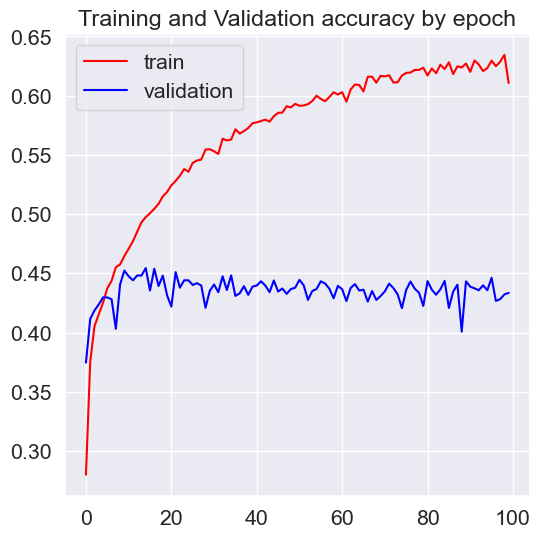

In [59]:

plt.plot(history.history['accuracy'], color = 'red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.title("Training and Validation accuracy by epoch")
plt.legend()
plt.show()

#### 2.Plot the training and validation loss history.

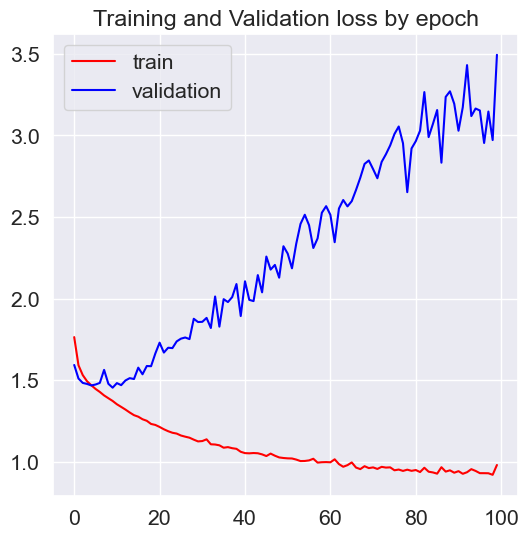

In [60]:
plt.plot(history.history['loss'], color = 'red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.title("Training and Validation loss by epoch")
plt.legend()
plt.show()

In simple cnn model implementation, we have seen that model is performing better in training but there is not significant improvement in case of validation model. In fact, loss is seen to be increasing in case of validation dataset.

#### 3. Report the testing accuracy and loss.

In [76]:
test_loss, test_accuracy = model.evaluate(test_ds)
print('Loss of test data: ', test_loss)
print('Accuracy of test data: ',test_accuracy)

707/707 [==============================] - 2s 3ms/step - loss: 3.4943 - accuracy: 0.4335
Loss of test data:  3.49430775642395
Accuracy of test data:  0.43348428606987


In [77]:
print(test_loss, test_accuracy)

3.49430775642395 0.43348428606987


#### 4. Show Confusion Matrix for testing dataset.

In [63]:
def get_actual_predicted_labels(model, dataset): 
  """
    Create a list of actual ground truth values and the predictions from the model.
    Args:
      dataset: An iterable data structure, such as a TensorFlow Dataset, with features and labels.
    Return:
      Ground truth and predicted values for a particular dataset.
  """
  actual = [labels for _, labels in dataset.unbatch()]
  predicted = model.predict(dataset)

  actual = tf.stack(actual, axis=0)
  predicted = tf.concat(predicted, axis=0)
  predicted = tf.argmax(predicted, axis=1)

  return actual, predicted

In [64]:
def plot_confusion_matrix(actual, predicted, labels, ds_type):
  cm = tf.math.confusion_matrix(actual, predicted)
  ax = sns.heatmap(cm, annot=True, fmt='g')
  sns.set(rc={'figure.figsize':(6, 6)})
  sns.set(font_scale=1.4)
  ax.set_title('Confusion matrix of action recognition for ' + ds_type)
  ax.set_xlabel('Predicted Action')
  ax.set_ylabel('Actual Action')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

707/707 [==============================] - 2s 3ms/step


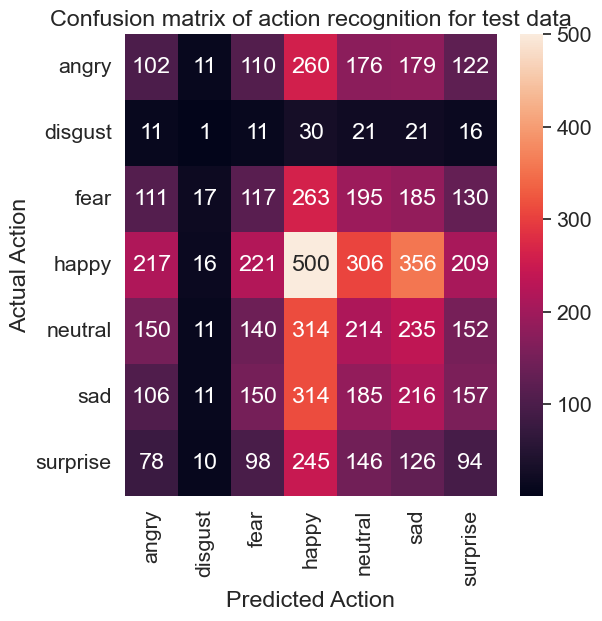

In [65]:
# Labels are nothing but the classes of facial expression in the dataset
labels = ['angry','disgust','fear','happy','neutral','sad','surprise']

actual, predicted = get_actual_predicted_labels(model, test_ds)
plot_confusion_matrix(actual, predicted, labels, 'test data')

#### As we have observed that our simple cnn model is giving accuracy of 43.35% only. We keep on modifing our model to get better performance with the dataset

#### 5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.

In [79]:
# Calculate precision and recall
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
precision_score = metrics.precision_score(actual, predicted, average='micro')
recall_score  = metrics.recall_score(actual, predicted, average='micro')
f1_score = (2*precision_score * recall_score) / (precision_score + recall_score)
print("Accuracy :", test_accuracy)
print("Precision Score : ",precision_score)
print("Recall Score : ",recall_score)
print('F1 Score : ',f1_score)

Accuracy : 0.43348428606987
Precision Score :  0.17605434474950468
Recall Score :  0.17605434474950468
F1 Score :  0.17605434474950468


In [81]:
train_data_1 = tf.keras.utils.image_dataset_from_directory(
    '../images/train',
    labels="inferred",
    label_mode="int",
    batch_size=10,
    image_size=(48, 48),
    shuffle=True
)

test_data_1 = tf.keras.utils.image_dataset_from_directory(
    '../images/validation',
    labels="inferred",
    label_mode="int",
    batch_size=10,
    image_size=(48, 48),
    shuffle=True
)

Found 28821 files belonging to 7 classes.
Found 7066 files belonging to 7 classes.


In [82]:
train_ds_1 = train_data_1.map(normalize_data)
test_ds_1 = test_data_1.map(normalize_data)

#### In the second attempt of improving model we have used 5 convolutional layers and 2 dense layers with drop out of 0.5, but since the paper dataset was not available publically we have used the infamous Facial Expression Dataset for classification of  7 expressions

In [84]:
# Adding more layers to improve accuracy
# crashing the session RAM, hence reduced the batch size
n_model = Sequential()

n_model.add(Conv2D(48, kernel_size = (3,3), padding = 'valid', input_shape = (48,48,3)))
n_model.add(Activation('relu'))
# n_model.add(BatchNormalization())
n_model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid'))

n_model.add(Conv2D(96, kernel_size = (3,3), padding = 'valid'))
n_model.add(Activation('relu'))
# n_model.add(BatchNormalization())
n_model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid'))

n_model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid'))
n_model.add(Activation('relu'))
n_model.add(Conv2D(56, kernel_size = (3,3), padding = 'valid'))
n_model.add(Activation('relu'))
n_model.add(Conv2D(56, kernel_size = (3,3), padding = 'valid'))
n_model.add(Activation('relu'))
# n_model.add(BatchNormalization())
n_model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid'))

n_model.add(Flatten())
n_model.add(Dense(128, activation = 'relu'))
n_model.add(Dropout(0.5))
n_model.add(Dense(56, activation = 'relu'))
n_model.add(Dropout(0.5))
#n_model.add(BatchNormalization())
n_model.add(Dense(7, activation  = 'softmax'))

In [85]:
n_model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 46, 46, 48)        1344      
                                                                 
 activation_14 (Activation)  (None, 46, 46, 48)        0         
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 23, 23, 48)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 21, 21, 96)        41568     
                                                                 
 activation_15 (Activation)  (None, 21, 21, 96)        0         
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 10, 10, 96)        0         
 ng2D)                                                

In [34]:
from keras.optimizers import SGD,Adam

In [86]:
learning_rate = 0.04
momentum = 0.5
decay_rate = 0.02/15
sgd = SGD(learning_rate=learning_rate, momentum=momentum, weight_decay=decay_rate,  nesterov=False)
# n_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

opt = Adam(lr=0.0005)
n_model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
n_history = n_model.fit(train_ds_1, epochs = 5, validation_data = test_ds_1)

Epoch 1/5
2883/2883 [==============================] - 36s 12ms/step - loss: 1.8261 - accuracy: 0.2450 - val_loss: 1.8097 - val_accuracy: 0.2583
Epoch 2/5
2883/2883 [==============================] - 38s 13ms/step - loss: 1.8145 - accuracy: 0.2486 - val_loss: 1.8090 - val_accuracy: 0.2583
Epoch 3/5
2883/2883 [==============================] - 37s 13ms/step - loss: 1.8133 - accuracy: 0.2486 - val_loss: 1.8089 - val_accuracy: 0.2583
Epoch 4/5
2883/2883 [==============================] - 37s 13ms/step - loss: 1.8125 - accuracy: 0.2486 - val_loss: 1.8088 - val_accuracy: 0.2583
Epoch 5/5
2883/2883 [==============================] - 36s 12ms/step - loss: 1.8122 - accuracy: 0.2486 - val_loss: 1.8089 - val_accuracy: 0.2583


707/707 [==============================] - 3s 5ms/step
Accuracy : 0.25827908515930176
Precision Score :  0.25827908293235213
Recall Score :  0.25827908293235213
F1 Score :  0.25827908293235213


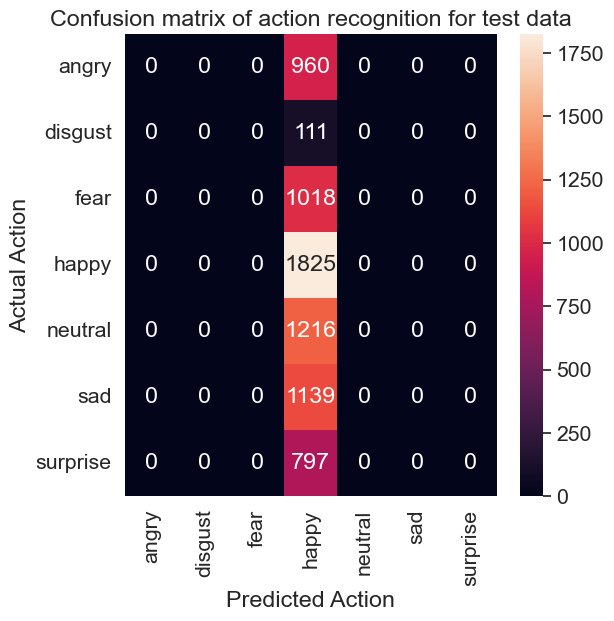

In [89]:
# Calculate precision and recall
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# Labels are nothing but the classes of facial expression in the dataset
test_loss_2, test_accuracy_2 = n_model.evaluate(test_ds_1)
labels = ['angry','disgust','fear','happy','neutral','sad','surprise']

actual_2, predicted_2 = get_actual_predicted_labels(n_model, test_ds_1)

precision_score_2 = metrics.precision_score(actual_2, predicted_2, average='micro')
recall_score_2  = metrics.recall_score(actual_2, predicted_2, average='micro')
f1_score_2 = (2*precision_score_2 * recall_score_2) / (precision_score_2 + recall_score_2)
print("Accuracy :", test_accuracy_2)
print("Precision Score : ",precision_score_2)
print("Recall Score : ",recall_score_2)
print('F1 Score : ',f1_score_2)

plot_confusion_matrix(actual_2, predicted_2, labels, 'test data')

#### As it is observed that the model is stuck at the val loss of 1.809 as well as validation accuracy of 0.2583
#### The stuck positions of the model can be seen in the below acuracy and loss graphs

##### This model was having the similar configuration(same number of layers as what the research paper had mentioned). We have also tried to implement the model with same configuration as per the paper but our model was throwing below error
##### ValueError: Input 0 of layer sequential_4 is incompatible with the layer. This was because we did not access have original data, which was of different dimensions. Hence, we modifed the model as per our end.

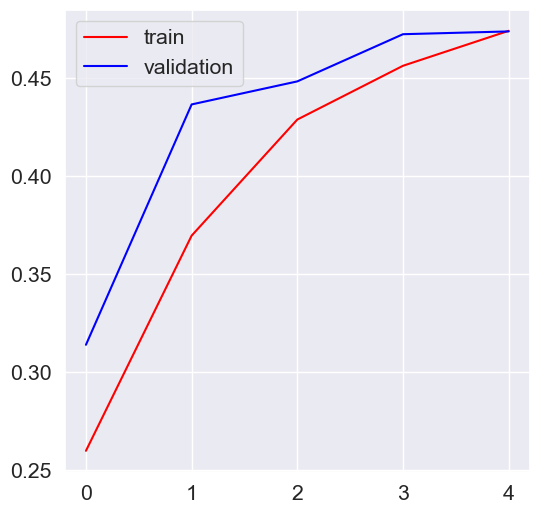

In [36]:

plt.plot(n_history.history['accuracy'], color = 'red', label='train')
plt.plot(n_history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

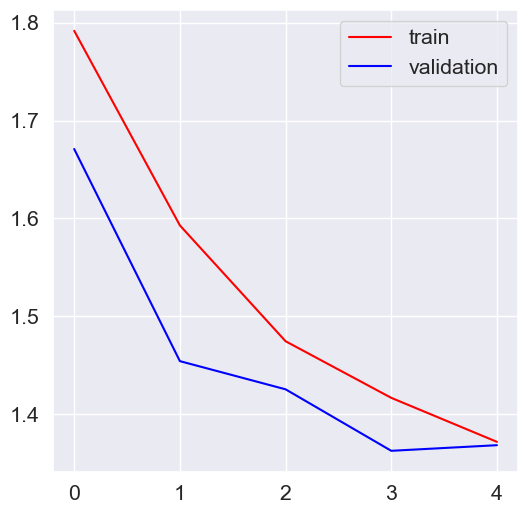

In [37]:
plt.plot(n_history.history['loss'], color = 'red', label='train')
plt.plot(n_history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [38]:
# Above model is stuck at a point, saddle point
from keras.layers import Activation

##### The above model with the adaptable parameters from the paper was getting stuck at a validation accuracy of 0.2583
##### Hence we modified the parameters in order to achieve better accuracy was attempted by us and not the rearch paper
##### As per the paper they tried 30 epoches. Therefore, we have also used the same number of epoches in the below model

In [39]:
# Adding layers to improve accuracy
# crashing the session RAM, hence reduced the batch size
reg_model = Sequential()

reg_model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (48,48,3)))
reg_model.add(BatchNormalization())
reg_model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

reg_model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
reg_model.add(BatchNormalization())
reg_model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

reg_model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
reg_model.add(BatchNormalization())
reg_model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

reg_model.add(Flatten())

reg_model.add(Dense(128,kernel_regularizer=regularizers.l2(0.001), activation = 'relu'))
reg_model.add(BatchNormalization())
reg_model.add(Dropout(0.5))
reg_model.add(Dense(64,kernel_regularizer=regularizers.l2(0.001), activation = 'relu'))
reg_model.add(BatchNormalization())
reg_model.add(Dropout(0.5))
reg_model.add(Dense(7, activation  = 'softmax'))

In [40]:
reg_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 21, 21, 64)        256       
 chNormalization)                                                
                                                      

In [41]:

reg_model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
reg_history = reg_model.fit(train_ds_1, epochs = 30, validation_data = test_ds_1)

Epoch 1/30
2883/2883 [==============================] - 38s 13ms/step - loss: 2.2046 - accuracy: 0.2788 - val_loss: 1.8843 - val_accuracy: 0.3634
Epoch 2/30
2883/2883 [==============================] - 39s 14ms/step - loss: 1.7953 - accuracy: 0.3933 - val_loss: 1.6686 - val_accuracy: 0.4411
Epoch 3/30
2883/2883 [==============================] - 42s 15ms/step - loss: 1.7119 - accuracy: 0.4267 - val_loss: 1.8149 - val_accuracy: 0.3801
Epoch 4/30
2883/2883 [==============================] - 41s 14ms/step - loss: 1.6570 - accuracy: 0.4569 - val_loss: 1.6310 - val_accuracy: 0.4706
Epoch 5/30
2883/2883 [==============================] - 41s 14ms/step - loss: 1.6168 - accuracy: 0.4753 - val_loss: 1.6461 - val_accuracy: 0.4581
Epoch 6/30
2883/2883 [==============================] - 42s 15ms/step - loss: 1.5707 - accuracy: 0.4914 - val_loss: 1.5589 - val_accuracy: 0.4948
Epoch 7/30
2883/2883 [==============================] - 42s 14ms/step - loss: 1.5491 - accuracy: 0.5010 - val_loss: 1.5483 -

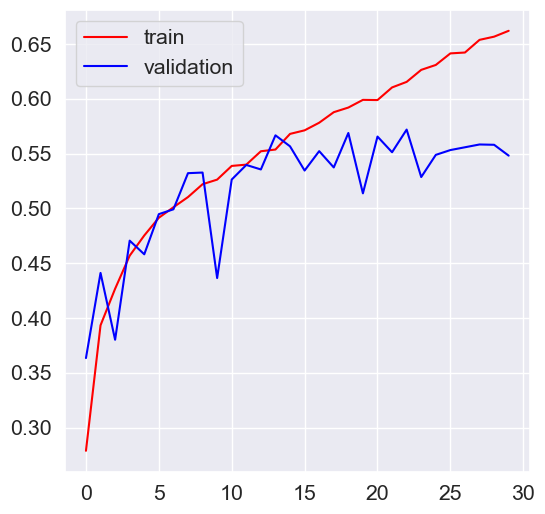

In [42]:
plt.plot(reg_history.history['accuracy'], color = 'red', label='train')
plt.plot(reg_history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

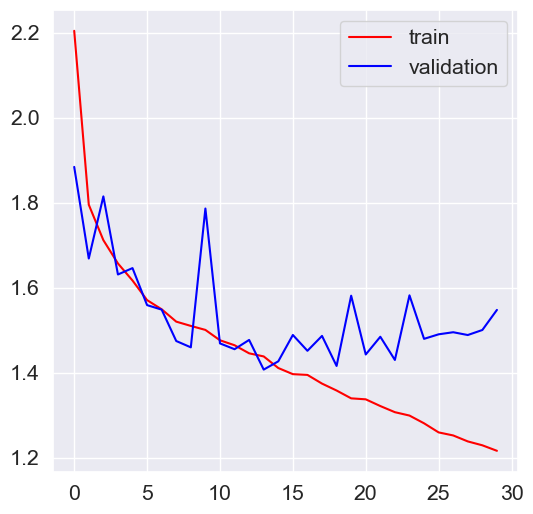

In [43]:
plt.plot(reg_history.history['loss'], color = 'red', label='train')
plt.plot(reg_history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

707/707 [==============================] - 4s 5ms/step - loss: 1.5477 - accuracy: 0.5481
Loss score :  1.5476717948913574
Accuracy score :  0.5481177568435669
707/707 [==============================] - 4s 5ms/step


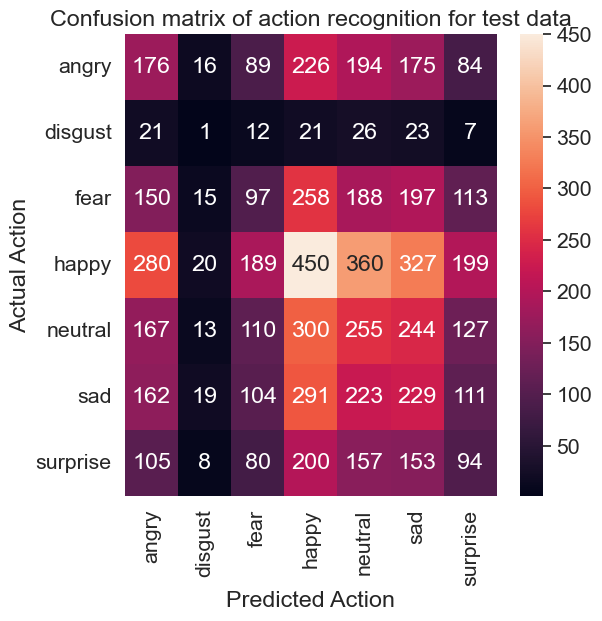

In [94]:
test_loss_3, test_accuracy_3 = reg_model.evaluate(test_ds_1)
print('Loss score : ', test_loss_3)
print('Accuracy score : ', test_accuracy_3)
actual_3, predicted_3 = get_actual_predicted_labels(reg_model, test_ds_1)
plot_confusion_matrix(actual_3, predicted_3, labels, 'test data')

In [95]:

precision_score_3 = metrics.precision_score(actual_3, predicted_3, average='micro')
recall_score_3  = metrics.recall_score(actual_3, predicted_3, average='micro')
f1_score_3 = (2*precision_score_3 * recall_score_3) / (precision_score_3 + recall_score_3)
print('Accuracy score : ',test_accuracy_3)
print("Precision Score : ",precision_score_3)
print("Recall Score : ",recall_score_3)
print("F1 score : ", f1_score_3)

Accuracy score :  0.5481177568435669
Precision Score :  0.18426266628927257
Recall Score :  0.18426266628927257
F1 score :  0.18426266628927257


We observed the accuracy of our CNN model as 54.8%. The accuracy of second model as per research paper was getting stuck at 25.83% for each of the epoch.
Therefore, we modified the CNN in order to attempt the accuracy at our end and we received the accuracy of 54.811%

# Conclusion

#### Conclusion : The Used dataset is a popular FER-2013 dataset. Which is shown to give max accuracy of nearly 66% in CCN with latest model, but later on with ensemble technique and 6 other CNNs combined gave the acuracy of 76%, whose implementation was out of scope of this paper. This the best accuracy achieved by the model similar to what has been described in the research paper, but because of the data unavailability we used the infamous facial expression dataset in our code.
#### The two models suggested by our selected research paper received the accuracy of 54%(100 epoches) and second model got stuck at the accuracy of 25.83%. Therefore, we modified the model to improve accuracy of the model with simple changes to the suggested model, whose details can be seen in depth in the last model, gave us little improvement of 54.8%(30 epoches)